In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(clinical_trial_df,mouse_drug_df)

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
#Calculate the mean of Tumor Volume mm3
avg_tumor_df = grouped_df.mean()
# Convert to DataFrame (need to reset the index)
avg_tumor_df = avg_tumor_df.reset_index()
# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped_df.sem()

# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors)
tumor_standard_errors_df.reset_index(inplace=True)

# Preview DataFrame
tumor_standard_errors_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_tumor_df = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


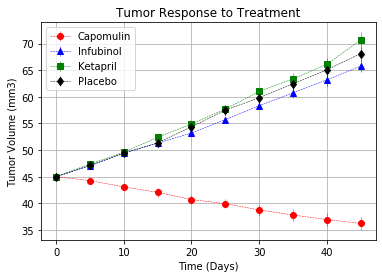

In [8]:
# Generate the Plot (with Error Bars)
#Create list to plot from 
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#For loop to iterate through the plot_list
for drug,marker,colors in drug_format_list:
    ste = tumor_standard_errors[drug]
    tumor_treatment_plt = plt.errorbar(pivot_avg_tumor_df.index,pivot_avg_tumor_df[drug],ste, fmt=marker,ls='--', label= labels, color=colors, linewidth=0.5)

legend_labels = []
for label in labels:
    legends = legend_labels.append(label)

plt.legend(legend_labels)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()


In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = merged_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
#Calculate the mean of Tumor Volume mm3
avg_met_df = grouped_met_df.mean()
# Convert to DataFrame (need to reset the index)
avg_met_df = avg_met_df.reset_index()
# Preview DataFrame
avg_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = merged_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_sites_mean = pd.DataFrame(avg_met_df)
# Preview DataFrame
met_sites_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [17]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# Save the Figure
plt.savefig("Fig2.png")
# Show the Figure
plt.show()

<Figure size 432x288 with 0 Axes>

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_df = merged_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
convert_df = grouped_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
convert_df.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)